In [1]:
import numpy as np
from pathlib import Path
import pickle

In [2]:
upstream = ['train', 'split-test-and-train']
product = None

In [3]:
# Parameters
upstream = {
    "split-test-and-train": {
        "Y_df_test": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train-Y_df_test.pkl",
        "output_size": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train-output_size.pkl",
        "X_df_train": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train-X_df_train.pkl",
        "input_size": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train-input_size.pkl",
        "Y_df_train": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train-Y_df_train.pkl",
        "nb": "C:\\Users\\victor\\Documents\\notebooks\\output\\split-test-and-train.ipynb",
    },
    "train": {
        "val_mask_df": "C:\\Users\\victor\\Documents\\notebooks\\output\\train-val_mask_df.pkl",
        "train_mask_df": "C:\\Users\\victor\\Documents\\notebooks\\output\\train-train_mask_df.pkl",
        "nb": "C:\\Users\\victor\\Documents\\notebooks\\output\\train.ipynb",
    },
}
product = {
    "nb": "C:\\Users\\victor\\Documents\\notebooks\\output\\plot-of-train-test-proportion.ipynb"
}


In [4]:
Y_df_train = pickle.loads(Path(upstream['split-test-and-train']['Y_df_train']).read_bytes())
train_mask_df = pickle.loads(Path(upstream['train']['train_mask_df']).read_bytes())
val_mask_df = pickle.loads(Path(upstream['train']['val_mask_df']).read_bytes())

## Plot of train/test proportion

In [5]:
plot_df = Y_df_train.merge(
    train_mask_df.drop('available_mask', axis=1).rename(columns={'sample_mask': 'sample_mask_train'}),
    how='left',
    on=['unique_id', 'ds']
).merge(
    val_mask_df.drop('available_mask', axis=1).rename(columns={'sample_mask': 'sample_mask_val'}),
    how='left',
    on=['unique_id', 'ds']
)

In [6]:
plot_df['y_train'] = np.where(plot_df['sample_mask_train'] == 1, plot_df['y'], np.nan)
plot_df['y_val'] = np.where(plot_df['sample_mask_val'] == 1, plot_df['y'], np.nan)
plot_df.sample(3)

,unique_id,ds,y,sample_mask_train,sample_mask_val,y_train,y_val
2936,Bulgaria,2020-12-28,5581.0,1,0,5581.0,NaN
217,Albania,2020-10-12,1160.0,1,0,1160.0,NaN
15140,Romania,2021-07-19,403.0,1,0,403.0,NaN


<AxesSubplot:title={'center':'Train vs Validation'}, xlabel='ds'>

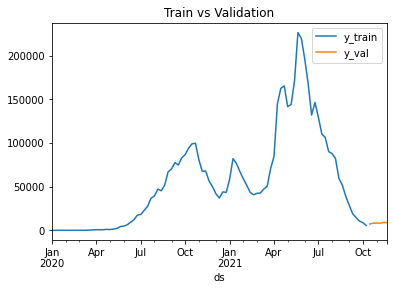

In [7]:
plot_df.query('unique_id == "Argentina"').set_index('ds')[['y_train', 'y_val']].plot(title="Train vs Validation")